# Griffiths  2.4

## Problem statement

Calculate $\langle x\rangle$, $\langle x^2\rangle$,$\langle p\rangle$, $\langle p^2\rangle$, $\sigma_x$, $\sigma_p$, for the nth stationary state of the infinite square well. Check that the uncertainty principle is satisfied. Which state closest to the uncertainty limit.

## Solution
The nth stationary state of the infinite square well is given by eq 2.35
$$\Psi_n(x,t) = \sqrt{2/a}sin(n\pi x/a)e^{-i(n^2\pi^2\hbar/2ma^2)t}$$

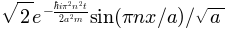

In [2]:
import sympy as sp
from sympy.physics.quantum.constants import hbar
sp.init_printing()

a, n, x, m, t = sp.symbols('a n x m t', real=True, positive=True)
n = sp.symbols('n', integer=True)

#define Psi
Psi = sp.sqrt(2/a)*sp.sin(n*sp.pi*x/a)*sp.exp(-sp.I*(n**2*sp.pi**2*hbar/2/m/a**2)*t)
Psi

In [3]:
Psisq = sp.conjugate(Psi)*Psi

### Calculate the expectation values

In [4]:
expectvx = sp.integrate(Psisq*x, (x, 0, a))
expectvx

    ⎛⎧   0     for n = 0⎞     ⎛⎧     0        for n = 0⎞
    ⎜⎪                  ⎟     ⎜⎪                       ⎟
    ⎜⎪    2             ⎟     ⎜⎪ 2       2             ⎟
  2⋅⎜⎨  -a              ⎟   2⋅⎜⎨a       a              ⎟
    ⎜⎪───────  otherwise⎟     ⎜⎪── - ───────  otherwise⎟
    ⎜⎪   2  2           ⎟     ⎜⎪4       2  2           ⎟
    ⎝⎩4⋅π ⋅n            ⎠     ⎝⎩     4⋅π ⋅n            ⎠
- ─────────────────────── + ────────────────────────────
             a                           a              

In [5]:
# Expectation value of x
sp.simplify(expectvx)

⎧0  for n = 0
⎪            
⎨a           
⎪─  otherwise
⎩2           

In [6]:
# Expectation value of x^2
expectvx2 = sp.integrate(Psisq*x**2, (x, 0, a))
sp.simplify(expectvx2)

⎧     0        for n = 0
⎪                       
⎪ 2       2             
⎨a       a              
⎪── - ───────  otherwise
⎪3       2  2           
⎩     2⋅π ⋅n            

We can take the derivative of $\langle x\rangle$ with respect to time to get $\langle p\rangle$, and use the momentum operator to get $\langle p^2\rangle$

In [8]:
# Expectation value of p
expectvp = m*sp.diff(expectvx, t)
expectvp

In [9]:
#Expectation value of p^2
expectvp2 = -(hbar**2)*sp.integrate(sp.conjugate(Psi)*sp.diff(Psi, x, 2), (x, 0, a))
sp.simplify(expectvp2)

⎧              π⋅n    
⎪   0      for ─── = 0
⎪               a     
⎪                     
⎨ 2  2  2             
⎪ℏ ⋅π ⋅n              
⎪────────   otherwise 
⎪    2                
⎩   a                 

#### Calculate $\sigma_x$ and $\sigma_p$

In [12]:
sigma_x = sp.sqrt(expectvx2 - (expectvx**2))
sp.simplify(sigma_x)

⎧           0             for n = 0
⎪                                  
⎪         ______________           
⎪        ╱  4       4              
⎪       ╱  a       a               
⎨√2⋅   ╱   ── - ───────            
⎪     ╱    24      2  2            
⎪   ╲╱          4⋅π ⋅n             
⎪───────────────────────  otherwise
⎪           a                      
⎩                                  

In [13]:
sigma_p = sp.sqrt(expectvp2 - expectvp**2)
sigma_p.simplify()

⎧             π⋅n    
⎪   0     for ─── = 0
⎪              a     
⎨                    
⎪ℏ⋅π⋅│n│             
⎪───────   otherwise 
⎩   a                

### Check the uncertainty principle

In [22]:
sp.simplify(sigma_x*sigma_p)

⎧                          0                            for n = 0
⎪                                                                
⎪⎧                                             π⋅n               
⎪⎪                   0                     for ─── = 0           
⎪⎪                                              a                
⎪⎪                                                               
⎪⎪             ______________________                            
⎨⎪            ╱        ⎛   2  2    ⎞                             
⎪⎨           ╱       2⋅⎝2⋅π ⋅n  - 3⎠                    otherwise
⎪⎪√3⋅ℏ⋅π⋅   ╱   -3 + ─────────────── ⋅│n│                        
⎪⎪         ╱               2  2                                  
⎪⎪       ╲╱               π ⋅n                                   
⎪⎪───────────────────────────────────────   otherwise            
⎪⎪                   6                                           
⎩⎩                                                               

We can tell from the equation that as n goes up, the value of $\sigma_x\sigma_p$ increases. So the closest value to the uncertainty limit would be when n = 1

Therefore the ground state $\psi_1$ is the closest state to the uncertainty limit.

----

## Portfolio references
    Problem 1.5
    Problem 1.9
    Problem 1.3

## Index terms
    Wave function
    Expectation values
    Probability
    Uncertainty principle
    Momentum operator 

## Book references
    eq 2.35

## External references